In [28]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
def data_preprocessor(fname):
    with open(fname, 'r') as f:
        rules = f.read().split('\n')

    X,  Y = [], []
    for rule in rules:
        (UA, OA, P) = rule.split(';')
        UA = list(map(int, UA.split(',')))
        OA = list(map(int, OA.split(',')))
        X.append(UA + OA)
        Y.append(-1 if not int(P) else 1)
    return (np.array(X), np.array(Y))

In [19]:
def plot_decision_boundary(x_reduced, x_predicted, clf):
    x_min, x_max = x_reduced[:, 0].min() - 5, x_reduced[:, 0].max() + 5
    y_min, y_max = x_reduced[:, 1].min() - 5, x_reduced[:, 1].max() + 5

    x_ = np.linspace(x_min, x_max, 500)
    y_ = np.linspace(y_min, y_max, 500)

    xx, yy = np.meshgrid(x_, y_)

    # evaluate the decision function on the meshgrid
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the decision function and the reduced data
    plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
    a = plt.contour(xx, yy, z, levels=[0], linewidths=1.5, colors='darkred')
    b = plt.scatter(x_reduced[x_predicted == 1, 0], x_reduced[x_predicted == 1, 1], c='white', edgecolors='k')
    c = plt.scatter(x_reduced[x_predicted == -1, 0], x_reduced[x_predicted == -1, 1], c='gold', edgecolors='k')
    plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
    plt.axis('tight')
    plt.show()

In [20]:
models_dict = {
    "OneClassCSVM": OneClassSVM(),
    "IsolationForest": IsolationForest(n_jobs=-1)
}

In [36]:
X, Y = data_preprocessor("abac-cat-v3.txt")
# minority class is the outlier
# train with majority class
X1 = X[Y == 1]

In [37]:
x_reduced = TSNE(n_components=2).fit_transform(X1)
x_reduced_full = TSNE(n_components=2).fit_transform(X)

              precision    recall  f1-score   support

          -1       0.85      0.92      0.88      3466
           1       0.04      0.02      0.03       566

    accuracy                           0.79      4032
   macro avg       0.44      0.47      0.45      4032
weighted avg       0.74      0.79      0.76      4032

[[3184  282]
 [ 555   11]]


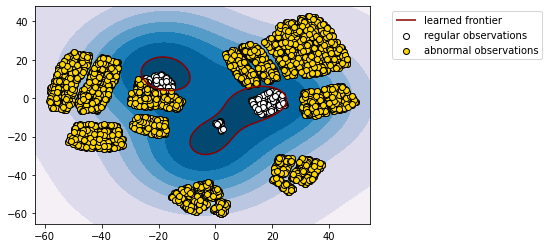

              precision    recall  f1-score   support

          -1       0.85      0.94      0.89      3466
           1       0.04      0.02      0.03       566

    accuracy                           0.81      4032
   macro avg       0.45      0.48      0.46      4032
weighted avg       0.74      0.81      0.77      4032

[[3251  215]
 [ 556   10]]


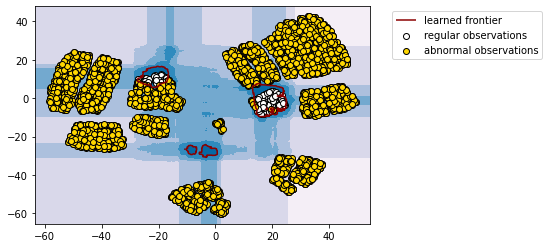

In [38]:
for (name, clf) in models_dict.items():
    clf.fit(x_reduced)
    x_predicted = clf.predict(x_reduced_full)
    print(classification_report(Y, x_predicted))
    print(confusion_matrix(Y, x_predicted))
    plot_decision_boundary(x_reduced_full, x_predicted, clf)